### Holly Figueroa
### DSC650 Week 6 Assignments  

**Based on Book Exercise 5.1**  
A Convolutional Network for MNIST Dataset

## 6.1

In [83]:
# Import libraries
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras import layers
from keras import models

In [84]:
# Load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [85]:
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [86]:
# Preprocessing
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Setting asside a validation set
val_images = train_images[:1000]
train_images = train_images[1000:]

val_labels = train_labels[:1000]
train_labels = train_labels[1000:]

In [87]:
print(train_images.shape, x_val.shape, train_labels.shape, y_val.shape)

(59000, 28, 28, 1) (1000, 28, 28, 1) (59000, 10) (1000, 10, 2)


In [88]:
# instantiate convnet
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [89]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64,
              validation_data = (val_images, val_labels))

Epoch 1/5
922/922 [==============================] - 25s 27ms/step - loss: 0.1810 - accuracy: 0.9428 - val_loss: 0.0826 - val_accuracy: 0.9840
Epoch 2/5
922/922 [==============================] - 25s 27ms/step - loss: 0.0507 - accuracy: 0.9845 - val_loss: 0.0698 - val_accuracy: 0.9880
Epoch 3/5
922/922 [==============================] - 21s 23ms/step - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0639 - val_accuracy: 0.9900
Epoch 4/5
922/922 [==============================] - 21s 23ms/step - loss: 0.0248 - accuracy: 0.9924 - val_loss: 0.0604 - val_accuracy: 0.9890
Epoch 5/5
922/922 [==============================] - 22s 24ms/step - loss: 0.0202 - accuracy: 0.9939 - val_loss: 0.0684 - val_accuracy: 0.9870


In [91]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


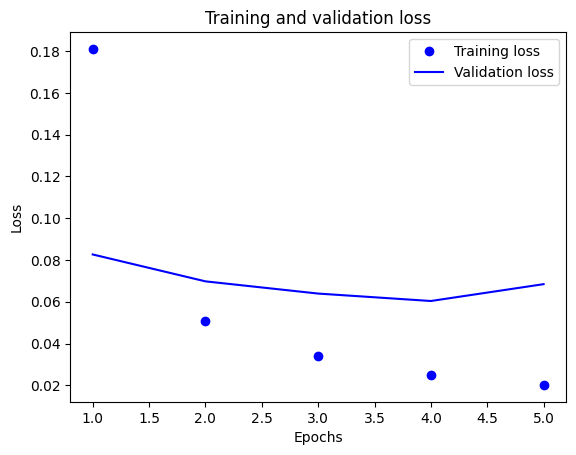

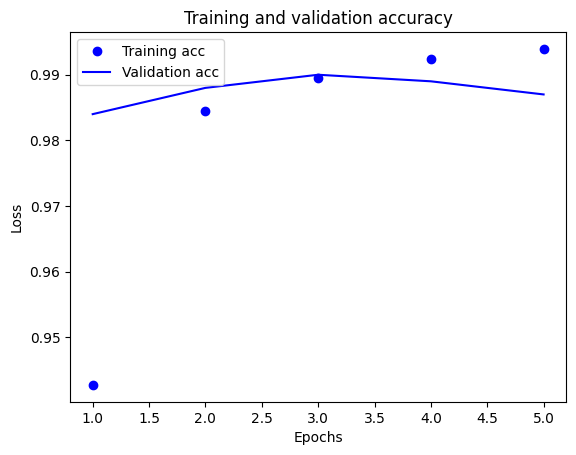

In [92]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Plotting the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc,'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [93]:
# Retrain and evaluate model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
922/922 [==============================] - 25s 26ms/step - loss: 0.0162 - accuracy: 0.9952
Epoch 2/5
922/922 [==============================] - 21s 23ms/step - loss: 0.0126 - accuracy: 0.9965
Epoch 3/5
922/922 [==============================] - 21s 22ms/step - loss: 0.0103 - accuracy: 0.9971
Epoch 4/5
922/922 [==============================] - 24s 25ms/step - loss: 0.0085 - accuracy: 0.9974
Epoch 5/5
922/922 [==============================] - 25s 27ms/step - loss: 0.0070 - accuracy: 0.9978


In [94]:
results = model.evaluate(test_images, test_labels)
results

313/313 [==============================] - 2s 6ms/step - loss: 0.0294 - accuracy: 0.9928


[0.029421526938676834, 0.9927999973297119]

In [ ]:
# Save Model
# model.save('6.1_model.h5')

In [98]:
# Make predictions
predictions = model.predict(test_images)
predictions.shape

313/313 [==============================] - 4s 9ms/step


(10000, 10)

In [99]:
# Save Predictions
import numpy as np
np.save('6.1_predictions', predictions)

In [100]:
!jupyter nbconvert --to html C:\DataLore\Python_Projects\dsc650\dsc650\assignments\assignment06\Assignment6.1.ipynb

[NbConvertApp] Converting notebook C:\DataLore\Python_Projects\dsc650\dsc650\assignments\assignment06\Assignment6.1.ipynb to html
[NbConvertApp] Writing 664878 bytes to C:\DataLore\Python_Projects\dsc650\dsc650\assignments\assignment06\Assignment6.1.html
